<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-01-02-glm-regression-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2. Generalized Linear Regression Model (Gaussian)

In this tutorial, we will explore Generalized Linear Models (GLMs), focusing on the Gaussian distribution, one of the most commonly used in GLMs. These models extend linear regression, enabling us to analyze a wider range of data types and relationships. We will start with an overview of GLM structure, discussing the random component (distribution), systematic component (predictors), and link function (mean transformation). We will establish a solid understanding of the fundamentals by constructing a GLM model using synthetic data without built-in R packages. Next, we will fit a GLM using R’s `glm()` function, interpreting the output to assess the influence of predictors and their statistical significance. We will also evaluate model performance and use R’s visualization libraries to create helpful graphics to interpret our results. This tutorial will equip you with the theoretical foundation and practical skills to confidently apply Gaussian GLMs in R for various statistical modeling applications.





## Oberview

**Generalized Linear Models (GLMs)** with a Gaussian distribution are useful for modeling relationships between a continuous response variable and one or more explanatory variables when the error terms are normally distributed. This is a generalization of linear regression where the assumptions of `Gaussian` distribution apply. Here's an outline of the mathematical background and the steps to fit such a model.

A GLM consists of three main components:

1.  **Random Component**: The response variable $Y$ follows a specific probability distribution. For Gaussian GLM, we assume:

    $$   Y \sim \text{Normal}(\mu, \sigma^2) $$

2.  **Systematic Component**: This represents the linear predictor, which is a linear combination of explanatory variables:

$$ \eta = X \beta = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p
  $$

where $X$ is the matrix of covariates and $\beta$ is the vector of coefficients.

3.  **Link Function**: The link function connects the expected value of $Y$ (i.e., $\mu = \mathbb{E}(Y))$ to the linear predictor: $$  g(\mu) = \eta $$

    For a Gaussian GLM, we use the identity link function g(μ)=μ, which gives:

    $$  \mu = X \beta $$



## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314948 sha256=d28dfefc214d3c4949ffc265d3ea03b9dddccf1e83621abaaa1a1aa77a6295f0
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## GLM Regresion Model

To fit a Generalized Linear Model (GLM) with a Gaussian distribution in R without using any packages, we’ll walk through each step, from generating synthetic data to estimating the model parameters and creating a summary statistics table. Let’s break down each mathematical concept and translate it into R code.

Steps to Fit the Model in R are below:

### Generate Synthetic Data

We'll start by generating synthetic data with four covariates and a continuous response variable.

1.  **Define Number of Observations**: ( $n$ = 100 ).

2.  **Generate Covariates** ($X_1, X_2, X_3, X_4$ ) from a normal distribution with mean ( 0 ) and standard deviation ( 1 ).

3.  **Specify True Coefficients**: Choose known values for the coefficients ($\beta_0$ = 5 ) (intercept), ($\beta$ = \[1.5, -2.0, 0.5, 3.0\]).

4.  **Generate the Response Variable (\$Y)** using the formula:

    $$ Y = \beta\_0 + \beta\_1 X_1 + \beta\_2 X_2 + \beta\_3 X_3 + \beta\_4 X_4 + \epsilon$$

where $\epsilon \sim N(0, 1)$ represents Gaussian noise.

In [ ]:
%%R
# Step 1: Generate Synthetic Data
set.seed(42)
n <- 100

# Generate covariates
X1 <- rnorm(n, 0, 1)
X2 <- rnorm(n, 0, 1)
X3 <- rnorm(n, 0, 1)
X4 <- rnorm(n, 0, 1)

# Define true coefficients
beta_0 <- 5
beta_true <- c(1.5, -2.0, 0.5, 3.0)

# Generate response variable Y
Y <- beta_0 + beta_true[1]*X1 + beta_true[2]*X2 + beta_true[3]*X3 + beta_true[4]*X4 + rnorm(n, 0, 1)

### Define the Design Matrix ( $X$ )

To estimate the coefficients, we need a design matrix ($X$) that includes an intercept term. The matrix ($X$) will look like this:

$$ X =
\begin{bmatrix}
1 & X_{1,1} & X_{1,2} & X_{1,3} & X_{1,4} \\
1 & X_{2,1} & X_{2,2} & X_{2,3} & X_{2,4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n,1} & X_{n,2} & X_{n,3} & X_{n,4}
\end{bmatrix} $$

where the first column is all ones for the intercept, and the remaining columns are values of the covariates ( \$X_1, X_2, X_3, X_4 \$) for each observation.

In [ ]:
%%R
# Step 2: Define Design Matrix X with Intercept
X <- cbind(1, X1, X2, X3, X4)
head(X)

               X1         X2         X3           X4
[1,] 1  1.3709584  1.2009654 -2.0009292 -0.004620768
[2,] 1 -0.5646982  1.0447511  0.3337772  0.760242168
[3,] 1  0.3631284 -1.0032086  1.1713251  0.038990913
[4,] 1  0.6328626  1.8484819  2.0595392  0.735072142
[5,] 1  0.4042683 -0.6667734 -1.3768616 -0.146472627
[6,] 1 -0.1061245  0.1055138 -1.1508556 -0.057887335



### Estimate Coefficients Using the Normal Equation

For Gaussian GLMs, estimating the coefficients ( $\beta$) reduces to solving the **Normal Equation**:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

**Compute** $X^TX$: This is the matrix product of the transpose of ($X$) with ($X$).

**Compute** $(X^T X)^{-1}$: Invert the result from step 1.

**Compute** $X^T Y$: This is the product of the transpose of $X$ and the response vector ($Y$ ).

**Solve for** $\hat{\beta}$: Multiply the results from step 2 with step 3 to obtain the estimated coefficients.


In [ ]:
%%R
# Step 3: Estimate Coefficients Using Normal Equation
XtX <- t(X) %*% X
XtX_inv <- solve(XtX)
XtY <- t(X) %*% Y
beta_hat <- XtX_inv %*% XtY
beta_hat

         [,1]
    4.8602898
X1  1.5859543
X2 -2.1482949
X3  0.5901182
X4  3.2139250


### Calculate Fitted Values and Residuals

-   \*\*Fitted Values $\hat{Y}$: Using the estimated coefficients $\hat{\beta}$, calculate the fitted values as:

$$ \hat{Y} = X \hat{\beta}$$

-   **Residuals**: Calculate the residuals, which represent the difference between the observed values $Y$ and fitted values $\hat{Y}$:

$$ \text{residuals} = Y - \hat{Y} $$


In [ ]:
%%R
# Step 4: Calculate Fitted Values and Residuals
Y_hat <- X %*% beta_hat
residuals <- Y - Y_hat
head(residuals)

            [,1]
[1,]  1.71618876
[2,] -0.71880623
[3,] -0.09868479
[4,]  0.06564803
[5,] -0.41685869
[6,] -0.71816280


### Compute Mean Squared Error (MSE) and Variance of Residuals

The Mean Squared Error (MSE) measures the average of the squared residuals:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

The variance of the residuals, used for calculating standard errors, is given by:

$$ \text{Var(residuals)} = \frac{1}{n - p - 1}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

where ($p$ ) is the number of covariates (in our case, ( p = 4)

In [ ]:
%%R
# Step 5: Calculate MSE and Variance of Residuals
mse <- mean(residuals^2)
variance_residuals <- sum(residuals^2) / (n - length(beta_hat))

cat("Mean Squared Error (MSE):", mse, "\n")
cat("Variance Residuals:", variance_residuals, "\n")


Mean Squared Error (MSE): 0.965506 
Variance Residuals: 1.016322 


### Calculate Standard Errors and t-values for Coefficients

-   **Standard Errors**: The standard error for each coefficient ( \hat{\beta}\_j ) is given by:

$$ \text{Std Error}(\hat{\beta}*j) =* \sqrt{\text{Var(residuals)} \times [ (X^T X)^{-1} ]_{jj} } $$

where ( $[(X^T X)^{-1}]{jj}$ is the $j-th$ diagonal element of the inverse of $X^T X$\$

-   **t-values**: The t-value for each coefficient tests the null hypothesis that the coefficient is zero. It is calculated as:

$$t\text{-value} = \frac{\hat{\beta}_j}{\text{Std Error}(\hat{\beta}_j)}$$

In [ ]:
%%R
# Step 6: Calculate Standard Errors and t-values
std_errors <- sqrt(variance_residuals * diag(XtX_inv))
t_values <- beta_hat / std_errors


### Create a Summary Table


In [ ]:
%%R
# Step 7: Create Summary Table
summary_table <- data.frame(
  Coefficient = beta_hat,
  `Std Error` = std_errors,
  `t-value` = t_values
)

# Display Results
print(summary_table)

   Coefficient  Std.Error    t.value
     4.8602898 0.10141388  47.925291
X1   1.5859543 0.09864811  16.076884
X2  -2.1482949 0.11244878 -19.104652
X3   0.5901182 0.10104992   5.839868
X4   3.2139250 0.11603554  27.697764


### Model Performance

Evaluating a Generalized Linear Model (GLM) involves several key metrics to assess its fit and predictive power. Below, I’ll outline the main evaluation metrics commonly used for a Gaussian GLM, along with their calculations.


#### Evaluation Matrix


1. ***Mean Squared Error (MSE)***:
   - Measures the average of the squares of the errors (residuals), which is the difference between the predicted and actual values.
   
   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

2. ***Root Mean Squared Error (RMSE)***:

   - The square root of MSE, providing an error metric in the same units as the response variable.
   
   $$ \text{RMSE} = \sqrt{\text{MSE}} $$
   

3. ***Mean Absolute Error (MAE)***:

   - Measures the average absolute errors, providing a straightforward interpretation of the average error magnitude.

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$


4. ***R-squared (\( R^2 \))***:

   - Indicates the proportion of variance in the response variable that can be explained by the model.

   $$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}  $$
   where:
   
   - $\text{SS}_{\text{res}} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $
   - $\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $

5. ***Adjusted R-squared***:

   - Adjusts the R-squared value based on the number of predictors in the model, providing a more accurate assessment when comparing models.
   
   $$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$
   
   where  $p$ is the number of predictors.

6. ***Akaike Information Criterion (AIC)***:

   - Provides a measure of model quality that accounts for the number of parameters.
   
   $$  \text{AIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + 2p  $$

7. ***Bayesian Information Criterion (BIC)***:

   - Similar to AIC but with a larger penalty for models with more parameters.
   
   $$   \text{BIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + p \log(n)$$
   

In [ ]:
%%R
### Calculating the Metrics

# Observed Values Y: The actual response values.
# Fitted Values Y_hat: The predicted response values from the model.
# umber of Observations, n: 100
# Number of Predictors, p : 4 (excluding the intercept)."

n <- 100  # Number of observations
p <- 4    # Number of predictors (X1, X2, X3, X4)

# Step 1: Calculate MSE
MSE <- mean((Y - Y_hat)^2)

# Step 2: Calculate RMSE
RMSE <- sqrt(MSE)

# Step 3: Calculate MAE
MAE <- mean(abs(Y - Y_hat))

# Step 4: Calculate R-squared
SS_res <- sum((Y - Y_hat)^2)  # Residual sum of squares
SS_tot <- sum((Y - mean(Y))^2)  # Total sum of squares
R_squared <- 1 - (SS_res / SS_tot)

# Step 5: Calculate Adjusted R-squared
adjusted_R_squared <- 1 - ((1 - R_squared) * (n - 1)) / (n - p - 1)

# Step 6: Calculate AIC
AIC <- n * log(SS_res / n) + 2 * (p + 1)  # +1 for the intercept

# Step 7: Calculate BIC
BIC <- n * log(SS_res / n) + (p + 1) * log(n)  # +1 for the intercept

# Print results
cat("Mean Squared Error (MSE):", MSE, "\n")
cat("Root Mean Squared Error (RMSE):", RMSE, "\n")
cat("Mean Absolute Error (MAE):", MAE, "\n")
cat("R-squared:", R_squared, "\n")
cat("Adjusted R-squared:", adjusted_R_squared, "\n")
cat("Akaike Information Criterion (AIC):", AIC, "\n")
cat("Bayesian Information Criterion (BIC):", BIC, "\n")

Mean Squared Error (MSE): 0.965506 
Root Mean Squared Error (RMSE): 0.9826017 
Mean Absolute Error (MAE): 0.7571292 
R-squared: 0.9372941 
Adjusted R-squared: 0.9346539 
Akaike Information Criterion (AIC): 6.489706 
Bayesian Information Criterion (BIC): 19.51556 



#### K-fold Cross-validation

-   **Split the Data**: Randomly divide the dataset into $K$ equal-sized folds.

-   **Training and Testing**:

    -   For each fold, use $k-1$ folds for training the model and the remaining fold for testing.

    -   Repeat this process $k$ times, ensuring that each fold serves as the test set once.

-   **Model Fitting**: Fit the GLM on the training set for each iteration.

-   **Prediction**: Use the fitted model to make predictions on the test set.

-   **Performance Metrics**: Calculate evaluation metrics (e.g., MSE, RMSE, MAE, etc.) for each fold.

-   **Aggregate Results**: Compute the average and standard deviation of the performance metrics across all folds

In [ ]:
%%R
# K-Fold Cross-Validation

k <- 10  # Number of folds
folds <- cut(seq(1, n), breaks = k, labels = FALSE)
cv_mse <- numeric(k)  # Store MSE for each fold

for (i in 1:k) {
  # Split data into training and validation sets
  test_indices <- which(folds == i, arr.ind = TRUE)
  train_indices <- setdiff(1:n, test_indices)

  # Training set
  X_train <- X[train_indices, ]
  Y_train <- Y[train_indices]

  # Testing set
  X_test <- X[test_indices, ]
  Y_test <- Y[test_indices]

  # Fit the model on training data
  XtX_train <- t(X_train) %*% X_train
  XtX_inv_train <- solve(XtX_train)
  XtY_train <- t(X_train) %*% Y_train
  beta_hat_train <- XtX_inv_train %*% XtY_train

  # Predict on test set
  Y_pred <- X_test %*% beta_hat_train

  # Calculate MSE for this fold
  cv_mse[i] <- mean((Y_test - Y_pred)^2)
}

# Average MSE across folds
average_cv_mse <- mean(cv_mse)
cat("Average K-Fold Cross-Validation MSE:", average_cv_mse, "\n")

Average K-Fold Cross-Validation MSE: 1.120817 


#### 1:1 Plot Predicted vs Observed Values

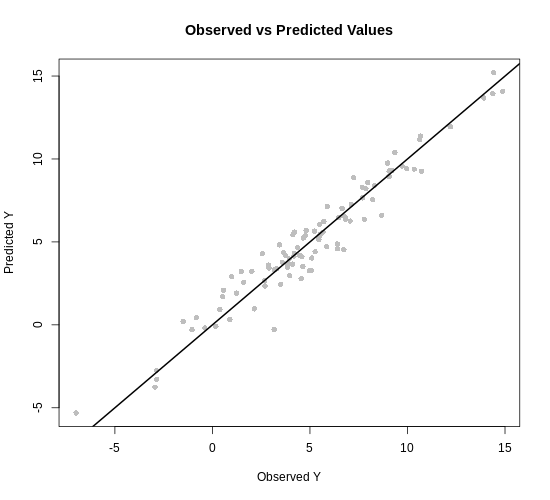

In [ ]:
%%R -h 500 -w 550 -u px
# Plot Observed vs Predicted Values
plot(Y, Y_hat, main = "Observed vs Predicted Values",
     xlab = "Observed Y",
     ylab = "Predicted Y", pch = 16, col = "grey")
abline(0, 1, col = "black", lwd = 2)  # Add a 1:1 line for reference

## GLM Regression Model with R

To fit a Generalized Linear Model (GLM) with a Gaussian distribution using the `glm()` function from base R, we’ll go through each step, including data exploration, fitting the model,  interpretation and evaluate the model performance with a oldout test data set.

### Check and Install Required R Packages

In [ ]:
%%R
pkg <- c(
		 'devtools',
	   'remotes',
		 'tidyverse',
     'plyr',
		 'gt',
		 'gtsummary',
		 'rstatix',
	   'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
     'RColorBrewer'
		 'boot'
      )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(plyr))
library(tidyverse)
library(plyr)
library(gt)
library(rstatix)
library(gtsummary)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
#library(metrica)
library(ggpmisc)
library(RColorBrewer)
library(boot)

Attaching package: ‘rstatix’



    desc, mutate



    filter


Attaching package: ‘gtsummary’



    mutate


Attaching package: ‘ggeffects’



    johnson_neyman


Attaching package: ‘Metrics’



    mae, mse, rmse



  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2

Attaching package: ‘ggpp’



    annotate




### Data

Our goal is to develop a GLM regression model to predict paddy soil arsenic (`SAs`) concentration using various irrigation water and soil properties. We have available data of 263 paired groundwater and paddy soil samples from arsenic contaminated areas in Tala Upazilla, Satkhira district, Bangladesh. This data was utilized in a publication titled "Factors Affecting Paddy Soil Arsenic Concentration in Bangladesh: Prediction and Uncertainty of Geostatistical Risk Mapping" which can be accessed via the this [URL](https://doi.org/10.1016/j.scitotenv.2011.10.008)

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will use `read_csv()` function of {readr} package to import data as a **tidy** data.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
meta.as<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic_meta_data.csv")

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 26 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Variables, Description

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
meta.as

# A tibble: 26 × 2
   Variables Description              
   <chr>     <chr>                    
 1 WAs       Irrigation water  Arsenic
 2 WP        Irrigation water P       
 3 WFe       Irrigation water  Fe     
 4 WEc       Irrigation water Ec      
 5 WpH       Irrigation water  pH     
 6 WMg       Irrigation water  Mg     
 7 WNa       Irrigation water Na      
 8 WCa       Irrigation water  Ca     
 9 WK        Irrigation water K       
10 WS        Irrigation water  S      
# ℹ 16 more rows
# ℹ Use `print(n = ...)` to see more rows


#### Summary Statistics

In [ ]:
%%R
mf |>
  # select variables
  dplyr::select (WAs, WP, WFe,
                WEc, WpH, SAoFe, SpH, SOC,
                Sand, Silt, SP, Elevation,
                Year_Irrigation, Distance_STW,
                SAs) |>
  rstatix::get_summary_stats (type = "common")

# A tibble: 15 × 10
   variable      n     min     max  median     iqr    mean      sd     se     ci
   <fct>     <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>  <dbl>
 1 WAs         263 1.1 e-2 4.58e-1 1.19e-1   0.1      0.13   0.079  0.005  0.01 
 2 WP          263 2.16e-1 2.70e+0 1.09e+0   0.456    1.11   0.368  0.023  0.045
 3 WFe         263 1.78e+0 1.10e+1 5.06e+0   2.64     5.29   1.97   0.121  0.239
 4 WEc         263 3.9 e-1 4.16e+0 1.08e+0   0.84     1.30   0.712  0.044  0.086
 5 WpH         263 6.58e+0 7.56e+0 7.01e+0   0.18     7.01   0.14   0.009  0.017
 6 SAoFe       263 1   e+3 4.94e+3 2.57e+3 565     2597.   626.    38.6   76.0  
 7 SpH         263 6.54e+0 8.71e+0 8.17e+0   0.35     8.12   0.309  0.019  0.038
 8 SOC         263 5.4 e-1 2.64e+0 1.35e+0   0.33     1.36   0.307  0.019  0.037
 9 Sand        263 4.9 e+0 2.79e+1 1.2 e+1   2.1     12.1    3.00   0.185  0.365
10 Silt        263 1.63e+1 7.01e+1 4.56e+1   6.75    44.5    8.03   0.495  0.975
11 SP   

#### Correlation

In [ ]:
%%R
mf |>
  # select variables
  dplyr::select (WAs, WP, WFe,
                WEc, WpH, SAoFe, SpH, SOC,
                Sand, Silt, SP, Elevation,
                Year_Irrigation, Distance_STW,
                SAs) |>
  rstatix::cor_test (SAs)

# A tibble: 14 × 8
   var1  var2               cor statistic        p conf.low conf.high method 
   <chr> <chr>            <dbl>     <dbl>    <dbl>    <dbl>     <dbl> <chr>  
 1 SAs   WAs              0.24      3.91  1.18e- 4  0.118      0.346  Pearson
 2 SAs   WP               0.15      2.48  1.38e- 2  0.0313     0.268  Pearson
 3 SAs   WFe              0.32      5.47  1.03e- 7  0.208      0.425  Pearson
 4 SAs   WEc              0.15      2.38  1.81e- 2  0.0251     0.262  Pearson
 5 SAs   WpH             -0.014    -0.232 8.17e- 1 -0.135      0.107  Pearson
 6 SAs   SAoFe           -0.11     -1.77  7.87e- 2 -0.227      0.0125 Pearson
 7 SAs   SpH              0.019     0.311 7.56e- 1 -0.102      0.140  Pearson
 8 SAs   SOC              0.34      5.81  1.79e- 8  0.227      0.441  Pearson
 9 SAs   Sand            -0.074    -1.21  2.29e- 1 -0.194      0.0470 Pearson
10 SAs   Silt            -0.26     -4.42  1.47e- 5 -0.373     -0.147  Pearson
11 SAs   SP               0.13      2.08  3.9

#### Boxplot and Jitter Plots

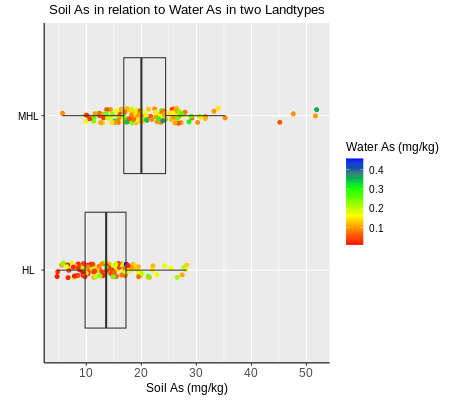

In [ ]:
%%R -w 450 -h 400 -u px

# Create a custom color
rgb.palette <- colorRampPalette(c("red","yellow","green", "blue"),
space = "rgb")

# Create plot
ggplot(mf, aes(y=SAs, x=Land_type)) +
  geom_point(aes(colour=WAs),size = I(1.7),
             position=position_jitter(width=0.05, height=0.05)) +
  geom_boxplot(fill=NA, outlier.colour=NA) +
  labs(title="")+
  # Change figure orientation
  coord_flip()+
  # add custom color plate and legend title
  scale_colour_gradientn(name="Water As (mg/kg)", colours =rgb.palette(10))+
  theme(legend.text = element_text(size = 10),legend.title = element_text(size = 12))+
  # add y-axis title and x-axis title leave blank
  labs(y="Soil As (mg/kg)", x = "")+
  # add plot title
  ggtitle("Soil As in relation to Water As in two Landtypes")+
  # customize plot themes
  theme(
        axis.line = element_line(colour = "black"),
        # plot title position at center
        plot.title = element_text(hjust = 0.5),
        # axis title font size
        axis.title.x = element_text(size = 12),
        # X and  axis font size
        axis.text.y=element_text(size=10,vjust = 0.5, hjust=0.5, colour='black'),
        axis.text.x = element_text(size=12))


#### Data Processing

We will apply following operation before fit a GLM regression model.

1.  **Feature engineering**: Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It is the practice of creating new features from existing ones or transforming them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  **Convert to factors**: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

3.  **Data normalization**: It is a technique used in data analysis and machine learning. It involves adjusting numerical values to a standard range, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. This helps to improve the efficiency and accuracy of machine learning algorithms. Data normalization is important because it helps machine learning models work better. By standardizing the data, the models can more easily identify patterns and relationships in the data, which leads to better predictions and results.

In [ ]:
%%R
df <- mf |>
  # select variables
  dplyr::select (WAs, WP, WFe,
                WEc, WpH, SAoFe, SpH, SOC,
                Sand, Silt, SP, Elevation,
                Year_Irrigation, Distance_STW,
                Land_type, SAs) |>
   # convert to factor
   dplyr::mutate_at(vars(Land_type), funs(factor))  |>
   # create a variable
   dplyr::mutate (Silt_Sand = Silt+Sand)  |>
   # drop two variables
   dplyr::select(-c(Silt,Sand)) |>
   # relocate or organized variable
   dplyr::relocate(SAs, .after=Silt_Sand) |>
   dplyr::relocate(Land_type, .after=Silt_Sand) |>
   # normalize the all numerical features
   #dplyr::mutate_at(1:13,  funs((.-min(.))/max(.-min(.)))) |>
   glimpse()

Rows: 263
Columns: 15
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WP              <dbl> 0.761, 1.194, 1.317, 1.545, 0.966, 1.058, 0.868, 0.890…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ WEc             <dbl> 1.03, 1.07, 1.40, 0.83, 1.42, 1.82, 1.71, 1.74, 1.57, …
$ WpH             <dbl> 7.03, 7.06, 6.84, 6.85, 6.95, 6.89, 6.86, 6.98, 6.82, …
$ SAoFe           <dbl> 2500, 2670, 2160, 2500, 2060, 2500, 2520, 2140, 2150, …
$ SpH             <dbl> 7.74, 7.87, 8.03, 8.07, 7.81, 7.77, 7.66, 7.89, 8.00, …
$ SOC             <dbl> 1.66, 1.26, 1.36, 1.61, 1.26, 1.74, 1.71, 1.69, 1.41, …
$ SP              <dbl> 13.79, 15.31, 15.54, 16.28, 14.20, 13.41, 13.26, 14.84…
$ Elevation       <dbl> 3, 5, 4, 3, 5, 2, 2, 3, 3, 3, 2, 5, 6, 6, 5, 5, 4, 6, …
$ Year_Irrigation <dbl> 14, 20, 10, 8, 10, 9, 8, 10, 8, 2, 20, 4, 15, 10, 5, 4…
$ Distance_STW    <dbl> 5, 6, 5, 8, 5, 5, 10, 8, 10, 8, 5, 5, 9, 5, 10, 10, 12…
$ Silt_Sand       

#### Split Data

We will use the `ddply()` function of the **plyr** package to split soil carbon datainto homogeneous subgroups using **stratified random sampling**. This method involves dividing the population into strata and taking random samples from each stratum to ensure that each subgroup is proportionally represented in the sample. The goal is to obtain a representative sample of the population by adequately representing each stratum.


In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(df,.(Land_type),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(df, .(Land_type),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

**Stratified random sampling** is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

### Fit a GLM Regression Model

In the context of a GLM with continuous response variables, the focus is on regression problems where the dependent variable, which is being predicted, is continuous. This implies that the variable can take any value within a specific range, and the objective is to identify a correlation between the dependent variable and the independent variables that can be used to make accurate predictions.

To create a `GLM` (continuous response variables) in `R`, we will use the `glm()` function with `family=gaussian(link = "identity")`. The `SAs` variable will be used as a response variable, while all the other variables in the `train` will serve as predictors


In [ ]:
%%R
fit.glm<-glm(SAs~.,train,
             family= gaussian(link = "identity")
             )

### Model Summary

 The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [ ]:
%%R
summary(fit.glm)


Call:
glm(formula = SAs ~ ., family = gaussian(link = "identity"), 
    data = train)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.7285499 26.0518562  -0.028 0.977723    
WAs             11.7666296  6.2625664   1.879 0.061993 .  
WP              -1.3422968  1.1754673  -1.142 0.255110    
WFe              0.6589071  0.2414463   2.729 0.007029 ** 
WEc              0.5274807  0.5938845   0.888 0.375710    
WpH              2.0223574  3.2464409   0.623 0.534165    
SAoFe           -0.0010864  0.0005924  -1.834 0.068416 .  
SpH              0.4987075  1.4610600   0.341 0.733280    
SOC              1.2451379  1.5372884   0.810 0.419111    
SP               0.1522753  0.0621375   2.451 0.015286 *  
Elevation       -0.3070947  0.2940649  -1.044 0.297843    
Year_Irrigation  0.7698443  0.0933677   8.245 4.53e-14 ***
Distance_STW    -0.1758050  0.0671111  -2.620 0.009609 ** 
Silt_Sand       -0.1562487  0.0438829  -3.561 0.000481 ***
Land_typeMHL 

The adequacy of a model is typically determined by evaluating the difference between **Null deviance and Residual deviance**, with a larger discrepancy between the two values indicating a better fit. Null deviance denotes the value obtained when the equation comprises solely the intercept without any variables, while Residual deviance denotes the value calculated when all variables are taken into account. The model can be deemed an appropriate fit when the difference between the two values is substantial enough.

To obtain the `AIC` (Akaike Information Criterion) values for a GLM model in R, you can use the `AIC()` function applied to the fitted model. The lower the AIC value, the better the model fits the data while penalizing for the number of parameters. You can compare AIC values between different models to assess their relative goodness-of-fit.


In [ ]:
%%R
AIC(fit.glm)

[1] 1125.03


### Model  Interpretation

You can create a report using `reoport()` function of {report} package

In [ ]:
%%R
report::report(fit.glm)

We fitted a linear model (estimated using ML) to predict SAs with WAs, WP, WFe,
WEc, WpH, SAoFe, SpH, SOC, SP, Elevation, Year_Irrigation, Distance_STW,
Silt_Sand and Land_type (formula: SAs ~ WAs + WP + WFe + WEc + WpH + SAoFe +
SpH + SOC + SP + Elevation + Year_Irrigation + Distance_STW + Silt_Sand +
Land_type). The model's explanatory power is substantial (R2 = 0.57). The
model's intercept, corresponding to WAs = 0, WP = 0, WFe = 0, WEc = 0, WpH = 0,
SAoFe = 0, SpH = 0, SOC = 0, SP = 0, Elevation = 0, Year_Irrigation = 0,
Distance_STW = 0, Silt_Sand = 0 and Land_type = HL, is at -0.73 (95% CI
[-51.79, 50.33], t(168) = -0.03, p = 0.978). Within this model:

  - The effect of WAs is statistically non-significant and positive (beta =
11.77, 95% CI [-0.51, 24.04], t(168) = 1.88, p = 0.060; Std. beta = 0.13, 95%
CI [-5.70e-03, 0.27])
  - The effect of WP is statistically non-significant and negative (beta = -1.34,
95% CI [-3.65, 0.96], t(168) = -1.14, p = 0.253; Std. beta = -0.07, 95% CI

### Model Performance

In [ ]:
%%R
performance::model_performance(fit.glm)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 |  RMSE | Sigma
------------------------------------------------------
1125.030 | 1128.307 | 1176.381 | 0.569 | 4.795 | 5.004


### Visualization of Model Assumptions

The package {performance} provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`.

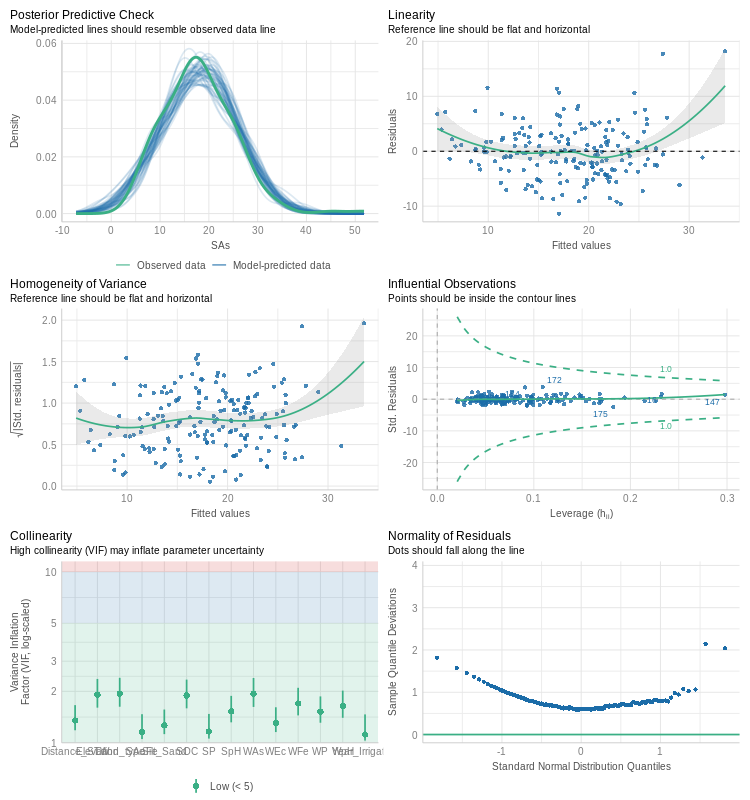

In [ ]:
%%R -w 750 -h 800 -u px
performance::check_model(fit.glm)

### Regression Model Visualization by {jtools}

The {jtools} package consists of a series of functions to automate visualization regression model.


In [ ]:
%%R
jtools::summ(fit.glm)

MODEL INFO:
Observations: 183
Dependent Variable: SAs
Type: Linear regression 

MODEL FIT:
χ²(14) = 5563.54, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.57
Pseudo-R² (McFadden) = 0.12
AIC = 1125.03, BIC = 1176.38 

Standard errors:MLE
-----------------------------------------------------
                         Est.    S.E.   t val.      p
--------------------- ------- ------- -------- ------
(Intercept)             -0.73   26.05    -0.03   0.98
WAs                     11.77    6.26     1.88   0.06
WP                      -1.34    1.18    -1.14   0.26
WFe                      0.66    0.24     2.73   0.01
WEc                      0.53    0.59     0.89   0.38
WpH                      2.02    3.25     0.62   0.53
SAoFe                   -0.00    0.00    -1.83   0.07
SpH                      0.50    1.46     0.34   0.73
SOC                      1.25    1.54     0.81   0.42
SP                       0.15    0.06     2.45   0.02
Elevation               -0.31    0.29    -1.04   0.30
Year_Irrigation 

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.

If we want the marginal effects for "Land_types", you may use `margins()` function of {margins} package:

In [ ]:
%%R
margins::margins(fit.glm, variables = "Land_type")

 Land_typeMHL
        2.551


**Marginal Effects**: These refer to the change in the dependent variable when an independent variable changes by one unit, while holding all other variables constant. In simpler terms, it tells us the impact of a small change in one variable on another variable, assuming everything else remains unchanged. Marginal effects are often calculated using derivatives in mathematical models. hey are not the same as marginal means or adjusted prediction

we get the same marginal effect using `avg_slopes()` function from the {marginaleffects} package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.glm, variables = "Land_type")


 Estimate Std. Error    z Pr(>|z|)   S 2.5 % 97.5 %
     2.55       1.03 2.47   0.0134 6.2 0.529   4.57

Term: Land_type
Type:  response 
Comparison: mean(MHL) - mean(HL)
Columns: term, contrast, estimate, std.error, statistic, p.value, s.value, conf.low, conf.high, predicted_lo, predicted_hi, predicted 



[{ggeffects}](https://strengejacke.github.io/ggeffects/) is a user-friendly package that helps to calculate adjusted predictions, also known as estimated marginal means, with ease. It allows you to calculate these predictions at the mean or representative values of covariates from statistical models. Additionally, you can compare pairwise contrasts, test predictions and differences in predictions for statistical significance, and produce visually appealing figures to display the results.

![alt text](http://drive.google.com/uc?export=view&id=1s8gWVmKcwHdoJB5ZNufFRWNGWAtz4xCD)


The package is built around three core functions:

-   `predict_response()` (understand your results)

-   `test_predictions()` (check for “significant” results)

-   `plot()` (communicate your results)

To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

In [ ]:
%%R
effect<-ggeffects::predict_response(fit.glm, "Land_type", margin = "empirical")
effect

# Average predicted values of SAs

Land_type | Predicted |       95% CI
------------------------------------
HL        |     16.63 | 15.31, 17.94
MHL       |     19.18 | 17.98, 20.37



The marginal effects of "MHL", relative to "HL" is:

In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 2.551465


{ggeffects} package also supports labelled data and the `plot()` method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

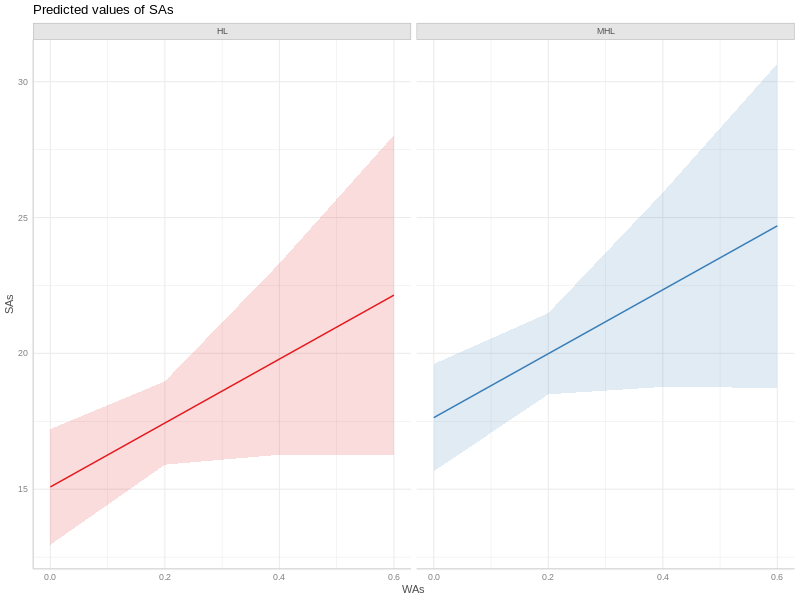

In [ ]:
%%R -w 800 -h 600 -u px
was.landtypes <- ggeffects::predict_response(fit.glm, terms = c("WAs", "Land_type"))
plot(was.landtypes, facets = TRUE)

In [ ]:
%%R
was.landtypes.year<- ggeffects::predict_response(fit.glm, terms = c("WAs", "Year_Irrigation", "Land_type"))
was.landtypes.year

# Predicted values of SAs

Year_Irrigation: 2.7
Land_type: HL

 WAs | Predicted |       95% CI
-------------------------------
0.00 |     11.88 |  9.71, 14.05
0.20 |     14.24 | 12.57, 15.90
0.40 |     16.59 | 12.98, 20.20
0.60 |     18.94 | 12.98, 24.91

Year_Irrigation: 2.7
Land_type: MHL

 WAs | Predicted |       95% CI
-------------------------------
0.00 |     14.43 | 12.30, 16.57
0.20 |     16.79 | 15.02, 18.55
0.40 |     19.14 | 15.41, 22.87
0.60 |     21.49 | 15.42, 27.57

Year_Irrigation: 6.9
Land_type: HL

 WAs | Predicted |       95% CI
-------------------------------
0.00 |     15.12 | 12.98, 17.25
0.20 |     17.47 | 15.93, 19.00
0.40 |     19.82 | 16.30, 23.34
0.60 |     22.18 | 16.29, 28.06

Year_Irrigation: 6.9
Land_type: MHL

 WAs | Predicted |       95% CI
-------------------------------
0.00 |     17.67 | 15.69, 19.64
0.20 |     20.02 | 18.53, 21.51
0.40 |     22.37 | 18.80, 25.95
0.60 |     24.73 | 18.76, 30.69

Year_Irrigation: 11.1
Land_type: HL

 WAs | Predicted |

`geom_smooth()` using formula = 'y ~ x'


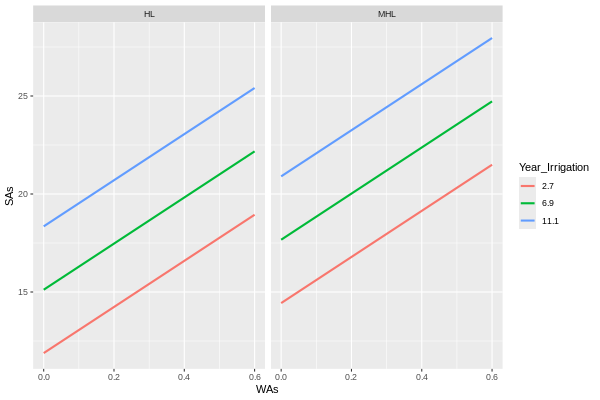

In [ ]:
%%R -w 600 -h 400 -u px
ggplot(was.landtypes.year, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = ggeffects::get_y_title(was.landtypes.year),
    x = ggeffects::get_x_title(was.landtypes.year),
    colour = ggeffects::get_legend_title(was.landtypes.year)
  )


`effect_plot()` function of {jtools}* package also plot simple effects in GLM regression models:

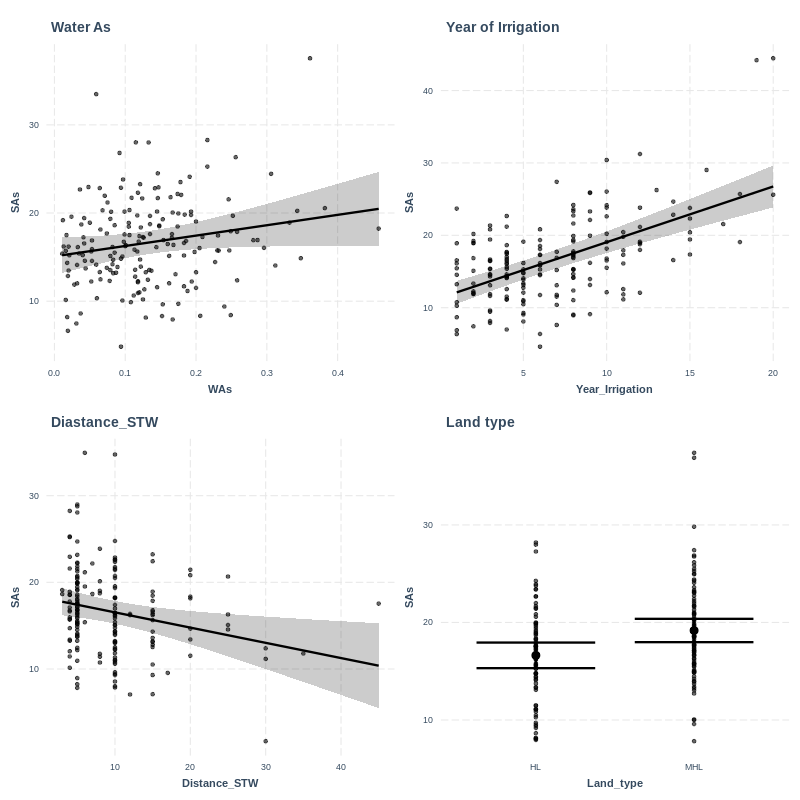

In [ ]:
%%R -w 800 -h 800 -u px

p1<-jtools::effect_plot(fit.glm,
                    main.title = "Water As",
                    pred = WAs,
                    interval = TRUE,
                    partial.residuals = TRUE)
p2<-jtools::effect_plot(fit.glm,
                    main.title = "Year of Irrigation ",
                    pred = Year_Irrigation,
                    interval = TRUE,
                    partial.residuals = TRUE)
p3<-jtools::effect_plot(fit.glm,
                    main.title = "Diastance_STW",
                    pred = Distance_STW ,
                    interval = TRUE,
                    partial.residuals = TRUE)
p4<-jtools::effect_plot(fit.glm,
                    main.title = "Land type",
                    pred = Land_type,
                    interval = TRUE,
                    partial.residuals = TRUE)
.libPaths('drive/My Drive/R')
library(patchwork)
(p1+p2)/(p3 +p4)

### Cross-validation

#### k-fold cross-validation

The {boot} package’s `cv.glm()` function provides an easy way to do `k-fold cross-validation` on GLM models. Here first we fit GLM model for entire dataset then we apply `cv.glm()` on fitted glm object.

In [ ]:
%%R
fit.glm.mf<-glm(SAs~.,mf,
             family= gaussian(link = "identity")
             )
cv_result <- cv.glm(data = mf, glmfit = fit.glm.mf, K = 5)

# Print cross-validation error
print(cv_result$delta)

However, this `cv.glm()` function does not directly provide predicted values for each observation in the test folds; it only provides the `cross-validated error` estimates. However, we can achieve this by manually implementing k-fold cross-validation and storing the predictions for each fold.

Here below you how to implement K-fold cross-validation using the `glm()` function in R:

In [ ]:
%%R
# Function for K-fold Cross-Validation with GLM
k_fold_cv_glm <- function(data, formula, k = 5) {
  # Check that the number of folds is valid
  if (k <= 1 || k > nrow(data)) {
    stop("Invalid number of folds.")
  }

  # Create a vector to store mean squared errors for each fold
  cv_mse <- numeric(k)
  # Vector to store predicted values
  predicted_values <- numeric(nrow(data))

  # Randomly assign folds
  set.seed(42)  # Ensure reproducibility
  folds <- sample(1:k, nrow(data), replace = TRUE)

  # K-fold Cross-validation Loop
  for (fold in 1:k) {
    # Create training and test sets
    test_idx <- which(folds == fold)  # Test indices for current fold
    train_idx <- setdiff(1:nrow(data), test_idx)  # Train indices

    # Create training and test datasets
    train_data <- data[train_idx, ]
    test_data <- data[test_idx, ]

    # Fit the GLM model on the training set
    model <- glm(formula, data = train_data)

    # Predict on the test set
    Y_pred <- predict(model, newdata = test_data)

    # Store predicted values for the current fold
    predicted_values[test_idx] <- Y_pred

    # Calculate Mean Squared Error (MSE) for this fold
    cv_mse[fold] <- mean((test_data[[as.character(formula[[2]])]] - Y_pred)^2)
  }

  # Return the average MSE and the predicted values
  return(list(average_mse = mean(cv_mse), predicted_values = predicted_values))
}

formula = SAs ~ WAs + WP + WFe + WEc + WpH + SAoFe + SpH + SOC +
                Sand + Silt+ SP + Elevation +
                Year_Irrigation + Distance_STW +
                Land_type

cv.glm <- k_fold_cv_glm(mf, formula, k = 5)  # Run K-fold CV

# Display Average Cross-Validation MSE
cat("Average Cross-Validation MSE:", cv.glm$average_mse, "\n")

# Step 4: Compare Predicted vs Observed Values
mf$Pred.SAs <- cv.glm$predicted_values

Average Cross-Validation MSE: 31.70601 


#### CV Prediction Performance

The {Matrics} package offers several useful functions to evaluate the performance of a regression model.

In [ ]:
%%R
RMSE<- Metrics::rmse(mf$SAs, mf$Pred.SAs)
MAE<- Metrics::mae(mf$SAs, mf$Pred.SAs)
MSE<- Metrics::mse(mf$SAs, mf$Pred.SAs)
MDAE<- Metrics::mdae(mf$SAs, mf$Pred.SAs)
print(peformance.matrics<-cbind("RMSE"=RMSE,
                                "MAE" = MAE,
                                "MSE" = MSE,
                                "MDAE" = MDAE))

         RMSE      MAE      MSE     MDAE
[1,] 5.613283 4.106696 31.50895 3.276106


#### 1:1 Plot

We can plot observed and predicted values with fitted regression line with {ggplot2} and {ggpmisc} packages.

`geom_smooth()` using formula = 'y ~ x'


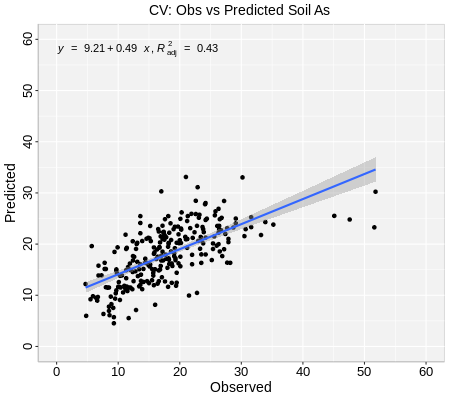

In [ ]:
%%R -w 450 -h 400 -u px

library(ggpmisc)
formula<-y~x

ggplot(mf, aes(SAs,Pred.SAs)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("CV: Obs vs Predicted Soil As ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,60), breaks=seq(0, 60, 10))+
  scale_y_continuous(limits=c(0,60), breaks=seq(0, 60, 10)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

### Prediction at Test Locations





The `predict()` function will be used to predict the amount of SOC present in the testing locations. This will help to validate the accuracy of the GLM regression model.

In [ ]:
%%R
test$Pred.SAs<-predict(fit.glm, test)

#### Prediction Performance

The {Matrics} package offers several useful functions to evaluate the performance of a regression model.



In [ ]:
%%R
RMSE<- Metrics::rmse(test$SAs, test$Pred.SAs)
MAE<- Metrics::mae(test$SAs, test$Pred.SAs)
MSE<- Metrics::mse(test$SAs, test$Pred.SAs)
MDAE<- Metrics::mdae(test$SAs, test$Pred.SAs)
print(peformance.matrics<-cbind("RMSE"=RMSE,
                                "MAE" = MAE,
                                "MSE" = MSE,
                                "MDAE" = MDAE))

         RMSE      MAE      MSE     MDAE
[1,] 5.765459 3.892464 33.24052 2.543197


#### 1:1 Plot

We can plot observed and predicted values with fitted regression line with **ggplot2** and **ggpmisc** packages.

`geom_smooth()` using formula = 'y ~ x'


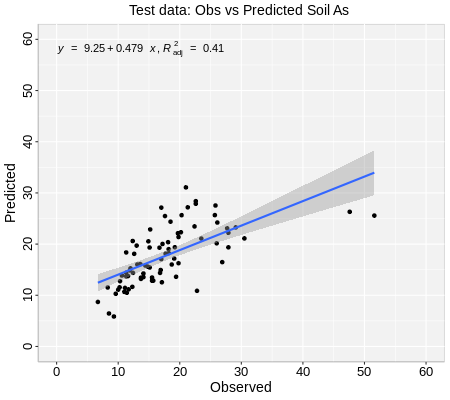

In [ ]:
%%R -w 450 -h 400 -u px

formula<-y~x

ggplot(test, aes(SAs,Pred.SAs)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Test data: Obs vs Predicted Soil As ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,60), breaks=seq(0, 60, 10))+
  scale_y_continuous(limits=c(0,60), breaks=seq(0, 60, 10)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

## Summary and Conclusion


This comprehensive tutorial covered the essentials of conducting Generalized Linear Model (GLM) regression analysis with a Gaussian distribution in R, from foundational concepts to advanced interpretation and evaluation techniques. We began by introducing the structure and key components of GLMs, particularly those that use the Gaussian distribution, and explored their suitability for continuous data. Building a GLM model from scratch allowed us to understand the model’s structure, including the linear predictors, error terms, and link functions.

Next, we used R’s `glm()` function to fit a Gaussian GLM more efficiently and compared it with the simpler `lm()` function, which directly applies to linear models. The tutorial guided interpreting model outputs, including understanding coefficients, statistical significance, and key model metrics. For this, we leveraged a range of powerful R packages such as `{performance}`, `{report}`, `{ggeffects}`, and `{jtools}` to streamline and enhance our interpretation and visualization of GLM outputs, making it easier to extract meaningful insights from the model.
We then addressed model performance evaluation using cross-validation and a hold-out test data set, demonstrating how these methods help assess model generalization and prevent overfitting. By using cross-validation and a separate test data set, we ensured a robust and unbiased estimate of model performance, essential for applying the model confidently to new data.

This tutorial equipped you with a thorough understanding of Gaussian GLMs, from constructing models and using R’s built-in functions to interpreting results and evaluating model performance. With knowledge of theoretical underpinnings and practical tools, you are now well-prepared to perform GLM regression analysis in R. The tutorial highlighted various packages that simplify and enhance interpretation, allowing you to select the tools that best align with your analytically goals—whether prioritizing simplicity, flexibility, or advanced customization. Armed with this knowledge, you can confidently apply GLM regression techniques to analyze continuous data in diverse fields and effectively communicate your findings through clear interpretations and visuals, making GLMs an invaluable tool in your data analysis toolkit.




## References

1.  [6.1 - Introduction to GLMs](https://online.stat.psu.edu/stat504/lesson/6/6.1)

2.  [GLM in R: Generalized Linear Model](https://www.datacamp.com/tutorial/generalized-linear-models)

3.  [GLM in R: Generalized Linear Model with Example](https://www.guru99.com/r-generalized-linear-model.html)

4. [Generalized Linear Models With Examples in R](https://www.academia.edu/37886943/Springer_Texts_in_Statistics_Generalized_Linear_Models_With_Examples_in_R)



